# Introducción

El objetivo de este proyecto es analizar los datos de biodiversidad del Servicio de Parques Nacionales de EEUU, particularmente alrededor de varias especias observadas en diferentes localizaciones de los parques nacionales de EEUU.

Este proyecto observará, analizará, preparará, mostrará los datos a través de diferentes gráficos y buscará explicar los hallazgos del análisis.

Aquí os mostramos las diferentes preguntas que este proyecto tratará de responder:

- ¿Cuál es la distribución del estatus de conservación para las especies?
- ¿Están ciertos tipos de especies más cerca de estar en peligro de extinción?
- ¿Son significativas las diferencias entre especies y su estado de conservación?
- ¿Qué animal es más frecuente y cuál es su distribución entre los parques de EEUU?

**Recursos de Datos:**

Ambos `observations.csv` y `species_info.csv` fueron provistos por [Codecademy.com](https://www.codecademy.com).

Nota: Los datos para este proyecto están *inspirados* por datos reales, pero son mayoritariamente ficticios.

## Observación

Es beneficioso el crear un proyecto de observación siempre que se comienza un nuevo proyecto. Abajo se crearon cuatro secciones para ayudar a guiar en el proceso del proyecto y su progreso. La primera sección son los objetivos del proyecto, esta sección definirá los objetivos de alto nivel y establecerá las intenciones para este proyecto. La siguiente sección son los datos; afortunadamente, en este proyecto, los datos ya se proporcionan, pero aún es necesario verificar si los objetivos del proyecto se pueden cumplir con los datos disponibles. En tercer lugar, habrá que pensar en el análisis, que incluya los métodos y preguntas que estén alineados con los objetivos del proyecto. Por último, la evaluación nos ayudará a sacar conclusiones y hallazgos de nuestro análisis.

### Objetivos del Proyecto

En este proyecto la perspectiva será a través de un analista de biodiversidad para el Servicio de Parques Nacionales de EEUU. El Servicio de Parques Nacionales de EEUU quiere garantizar la supervivencia de especies en riesgo para mantener el nivel de biodiversidad dentro de sus parques. Por lo tanto, los principales objetivos como analista serán comprender las características de las especies y su estado de conservación, y esas especies y su relación con los parques nacionales de EEUU. Algunas preguntas que se plantean:

- ¿Cuál es la distribución del estatus de conservación para las especies?
- ¿Están ciertos tipos de especies más cerca de estar en peligro de extinción?
- ¿Son significativas las diferencias entre especies y su estado de conservación?
- ¿Qué animal es más frecuente y cuál es su distribución entre los parques de EEUU?

### Datos

Este proyecto tiene dos conjuntos de datos que vinieron con el paquete. El primer archivo `csv` tiene información sobre cada especie y el otro tiene las observaciones de las especies con las localizaciones de los parques. Estos datos serán utilizados para analizar los objetivos del proyecto.

### Análisis

En esta sección, emplearemos estadísticas descriptivas y visualizaciones de datos para entender los datos mejor. La inferencia estadística también será usada para testear si los valores observados son estadísticamente significativos. Algunas de las métricas clave que se calcularán incluyen:

1. Las distribuciones
1. Las cantidades
1. Las relaciones entre especies
1. El estatus de conservación de las especies.
1. Las observaciones de las especies en los parques.

### Evaluación

Por último, es una buena idea el revisar los objetivos y comprobar si los resultados del análisis corresponde a las preguntas que planteamos al principio (en la sección de objetivos). Esta sección también reflejará cuanto hemos aprendido a través del proceso, y si alguna de las cuestiones fué imposible de responder. Esto también podría incluir limitaciones o si algo del análisis se podría haber hecho usando metodologías diferentes.

## Importar los Módulos de Python

Primero, importaremos los módulos principales que serán usados en este proyecto:

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

## Cargando los Datos

Para analizar el estatus de conservación de las especies y sus observaciones en los parques nacionales de EEUU, cargaremos los conjuntos de datos en `Dataframes`. Una vez cargados como `DataFrames`, los datos se pueden explorar y visualizar con Python.

En los siguientes pasos, cargamos los archivos `observations.csv` y `species_info.csv` como `DataFrames` los cuales llamaremos `observaciones` y `especies` respectivamente. Los `DataFrames` recién creados se vislumbran con `.head()` para comprobar su contenido.

### Especies

El fichero `species_info.csv` contiene información sobre las diferentes especies en los Parques Nacionales de EEUU. Las columnas en el conjunto de datos incluyen:

- **category** - La categoría de la taxonomía de cada especie.
- **scientific_name** - El nombre científico de cada especie.
- **common_names** - Los nombres comunes de cada especie.
- **conservation_status** - El estatus de conservación de las especies.

In [2]:
especies = pd.read_csv('species_info.csv',encoding='utf-8')
especies.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### Observaciones

El fichero `observations.csv` contiene información de los avistamientos registrados de diferentes especies en los parques nacionales de EEUU en los últimos 7 días. Las columnas incluidas son:

- **scientific_name** - El nombre científico de cada especie.
- **park_name** - El nombre del parque nacional.
- **observations** - El número de observaciones en los últimos 7 días.

In [3]:
observaciones = pd.read_csv('observations.csv', encoding='utf-8')
observaciones.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Características de los Datos

Lo siguiente será comprobar las dimensiones de los conjuntos de datos, para `especies`hay 5,824 filas y 4 columnas mientras que para `observaciones` tiene 23,296 filas y 3 columnas.

In [4]:
print(f"Forma de especies: {especies.shape}")
print(f"Forma de observaciones: {observaciones.shape}")

Forma de especies: (5824, 4)
Forma de observaciones: (23296, 3)


## Explorar los Datos

### Especies

Es tiempo de explorar los datos de `especies` un poco más en profundidad. Lo primero es encontrar el número de especies distintas en los datos. Usaremos la columna `scientific_name` para obtener 5,541 especies únicas. ¡Parece ser que hay muchas especies en los parques nacionales de EEUU!

In [5]:
print(f"Número de especies:{especies.scientific_name.nunique()}")

Número de especies:5541


Lo siguiente es encontrar el número de `category` que están representadas en los datos y hay 7 incluyendo animales y plantas.

In [6]:
print(f"Número de categorías:{especies.category.nunique()}")
print(f"Categorías:{especies.category.unique()}")

Número de categorías:7
Categorías:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Aquí existe la posibilidad de profundizar un nivel más y ver el recuento de `category` en los datos. Las plantas vasculares son, con diferencia, la mayor proporción de especies con 4.470 en los datos, siendo los reptiles la menor cantidad con 79.

In [7]:
especies.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Otra columna para explorar es `conservation_status`. La columna tiene 4 categorías, `Species of Concern`, `Endangered`, `Threatened`, `In Recovery`, y valores `nan`.

In [8]:
print(f"Número de estatus de conservación:{especies.conservation_status.nunique()}")
print(f"Únicos estatus de conservación:{especies.conservation_status.unique()}")

Número de estatus de conservación:4
Únicos estatus de conservación:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


A continuación se realiza un recuento del número de observaciones en el desglose de las categorías en `conservation_status`. Hay 5.633 valores `nan` lo que significa que son especies sin preocupaciones. Por otro lado hay 161 especies en preocupación, 16 en peligro de extinción, 10 amenazadas y 4 en recuperación.

Nota: En la mayoría de los casos, encontrar valores `nan` debe tratarse con cuidado, pero la ausencia de datos aquí significa que estas especies no se encuentran bajo ningún estado de conservación.

In [9]:
print(f"Valores nan:{especies.conservation_status.isna().sum()}")
print(especies.groupby("conservation_status").size())

Valores nan:5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


### Observaciones

La siguiente sección analiza los datos de `observaciones`. La primera tarea es verificar la cantidad de parques que hay en el conjunto de datos y solo hay 4 parques nacionales.

In [10]:
print(f"Número de parques:{observaciones.park_name.nunique()}")
print(f"Parques únicos:{observaciones.park_name.unique()}")

Número de parques:4
Parques únicos:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Aquí están el número total de observaciones registradas en los parques, hay 3,314,739 avistamientos en los últimos 7 días... ¡Hay un montón de observaciones!

In [11]:
print(f"Número total de observaciones:{observaciones.observations.sum()}")

Número total de observaciones:3314739


## Análisis

Esta sección empezará analizando los datos después de la exploración inicial. La primera tarea será limpiar y explorar la columna `conservation_status` en `especies`.

La columna `conservation_status` tiene varios valores posibles:
- `Species of Concern`: en declive o parecen necesitar conservación.
- `Threatened`: vulnerables al peligro en un futuro próximo.
- `Endangered`: gravemente en riesgo de extinción.
- `In Recovery`: anteriormente "en peligro de extinción", pero actualmente no está en peligro de extinción en todo o en una parte significativa de su área de distribución.

En la exploración, se detectaron muchos valores `nan`. Estos valores necesitarán ser convertidos a `No Intervention`.

In [12]:
especies.fillna('No Intervention', inplace=True)
especies.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Lo siguiente es verificar las diferentes categorías que están anidadas en la columna `conservation_status`, excepto aquellas que no requieren intervención. A continuación encontrará la tabla y el gráfico para explorar.

Para aquellos en estado de `Endangered`, 7 eran mamíferos y 4 eran aves. En el estado `In Recovery`, había 3 aves y 1 mamífero, lo que posiblemente podría significar que las aves se están recuperando más que los mamíferos.

In [13]:
conservacionCategoria = especies[especies.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"]).scientific_name.count().unstack()

conservacionCategoria

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


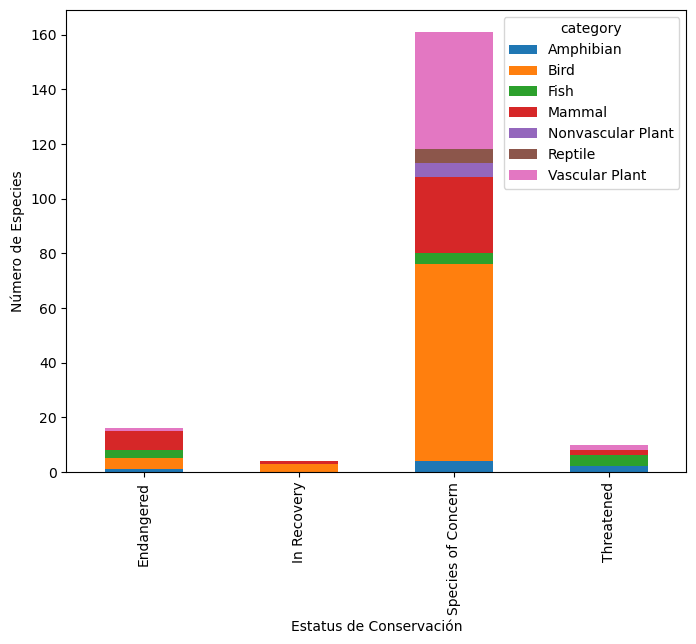

In [14]:
ax = conservacionCategoria.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Estatus de Conservación")
ax.set_ylabel("Número de Especies");

### En conservación

La siguiente cuestión es si ciertos tipos de especies son más propensos a estar en peligro. Esto puede ser respondido creando una nueva columna llamada `is_protected` e incluyendo cualquier especie que tenga un valor diferente de `No Intervention`.

In [15]:
especies['is_protected'] = especies.conservation_status != 'No Intervention'

Una vez creada la nueva columna, agrupamos por `category` y `is_protected` para mostrar el desglose de cada tipo de especie y estado de protección.

Es fácil ver que las aves, las plantas vasculantes, y los mamíferos tienen un número absoluto de especies protegidas mayor.

In [16]:
categoria_total = especies.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()\
                        .pivot(columns='is_protected', index='category', values='scientific_name').reset_index()
categoria_total.columns = ['category', 'not_protected', 'protected']

categoria_total

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Los números absolutos no son siempre el estadístico más útil, también es importante calcular el ratio de protección de cada `category` expuesta en los datos. Desde este análisis, uno puede ver que ~17 por ciento de los mamíferos estuvieron bajo protección, como también ~15 por ciento de las aves.

In [17]:
categoria_total['percent_protected'] = categoria_total.protected / \
                                        (categoria_total.protected + categoria_total.not_protected) * 100

categoria_total

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


### Significancia Estadística

Esta sección ejecutará algunas pruebas de chi-cuadrado para ver si diferentes especies tienen diferencias estadísticamente significativas en las tasas de estado de conservación. De cara a ejecutar una prueba chi cuadrado, necesitaremos crear una tabla de contingencias. La tabla de contingencias debería verse así:

||protegido|no protegido|
|-|-|-|
|Mamíferos|?|?|
|Aves|?|?|

El primer test lo llamaremos `contingencia1` y necesitará ser rellenado con los números correctos para los mamíferos y las aves.

Los resultados de la prueba chi-cuadrado devuelven varios valores, el segundo valor el cuál es 0.69 es el p-valor. El p-valor estándar para probar la significación estadística es 0.05. Para el valor recibido de este test, el valor de 0.69 es nucho mayor que 0.05. En el caso de mamíferos y aves no parece que haya ninguna relación significativa entre ellos, es decir, las variables son independientes.

In [18]:
from scipy.stats import chi2_contingency

contingencia1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingencia1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

Para el siguiente par, vamos a probar la diferencia entre `Reptile` y `Mammal`.

El formato es de nuevo como el de abajo:

||protegido|no protegido|
|-|-|-|
|Mamíferos|?|?|
|Reptiles|?|?|

Esta vez el p-valor es 0.038 el cuál está por debajo del umbral estándar de 0.05 lo cuál se puede tomar como que la diferencia entre reptiles y mamíferos es estadísticamente significativa. Se ha demostrado que los mamíferos tienen una tasa estadísticamente significativa más alta de protección necesaria en comparación con los reptiles.

In [19]:
contingencia2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingencia2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

### Especies en Parques

El siguiente conjunto de análisis provendrá de datos de los conservacionistas, ya que han estado registrando avistamientos de diferentes especies en varios parques nacionales durante los últimos 7 días.

El primer paso es observar los nombres comunes de `especies` para obtener una idea de los animales más frecuentes en el conjunto de datos. Los datos deberán dividirse en nombres individuales.

In [20]:
from itertools import chain
import string

def eliminar_puntuaciones(texto):
    for puntuacion in string.punctuation:
        texto = texto.replace(puntuacion, '')
    return texto

nombres_comunes = especies[especies.category == "Mammal"].common_names.apply(eliminar_puntuaciones).str.split().tolist()

nombres_comunes[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

El siguiente paso es limpiar las palabras duplicadas en cada fila, ya que no deben contarse más de una vez por especie.

In [21]:
filasLimpiadas = []

for fila in nombres_comunes:
    fila = list(dict.fromkeys(fila))
    filasLimpiadas.append(fila)
    
filasLimpiadas[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

A continuación, las palabras deben agruparse en una lista para facilitar su uso.

In [22]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in filasLimpiadas))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

Ahora los datos están preparados para que se pueda contar el número de apariciones de cada palabra. Desde este análisis, parece que `Bat` aparece 23 veces mientras que `Shrew` aparece 18 veces.

In [23]:
palabras_contadas = []

for i in res:
    x = res.count(i)
    palabras_contadas.append((i,x))

pd.DataFrame(set(palabras_contadas), columns =['Palabra', 'Total']).sort_values("Total", ascending = False).head(10)

,Palabra,Total
87,Bat,23
91,Shrew,18
199,Myotis,17
149,Mouse,16
11,Chipmunk,13
24,American,12
73,Squirrel,12
202,Vole,11
68,Eastern,11
63,Mountain,10


En los datos, hay varios nombres científicos diferentes para diferentes tipos de murciélagos. La siguiente tarea es descubrir qué filas de `especies` se refieren a murciélagos. Se creará una nueva columna formada por valores booleanos para comprobar si `is_bat` es `True`.

In [24]:
especies['is_bat'] = especies.common_names.str.contains(r"\bBat\b", regex = True)

especies.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


Aquí hay un subconjunto de datos donde `is_bat` es verdadero, y al regresar se ven las filas que coinciden. Parece haber muchas especies de murciélagos y una mezcla de especies protegidas y no protegidas.

In [25]:
especies[especies.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


Los siguientes resultados de las especies de murciélago serán mergeadas con `observaciones` para crear un `DataFrame` con las observaciones de murciélagos a lo largo de los cuatro parques nacionales de EEUU.

In [26]:
observaciones_murcielagos = observaciones.merge(especies[especies.is_bat])
observaciones_murcielagos

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


Veamos cuántas observaciones de murciélagos en total (a través de todas las especies) fueron producidas en cada parque nacional.

El número total de murciélagos observados en cada parque en los últimos 7 días están en la tabla de abajo. Yellowstone National Park parece ser el que tiene más con 8,362 observaciones y the Great Smoky Mountains National Park el que tiene menos con 2,411.

In [27]:
observaciones_murcielagos.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Ahora veamos cada parque desglosado por avistamientos de murciélagos protegidos y no protegidos. Parece que todos los parques, excepto the Great Smoky Mountains National Park, tienen más avistamientos de murciélagos protegidos que los que no lo son. Esto podría considerarse una gran señal para los murciélagos.

In [28]:
obs_por_parque = observaciones_murcielagos.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_por_parque

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


A continuación se muestra un gráfico del resultado de la última manipulación de datos. En este gráfico se puede ver que los Parques Nacionales de Yellowstone y Bryce parecen estar haciendo un gran trabajo con sus poblaciones de murciélagos, ya que hay más avistamientos de murciélagos protegidos en comparación con especies no protegidas. Es posible que The Great Smoky Mountains National Park necesite intensificar sus esfuerzos de conservación, ya que ha visto más especies no protegidas.

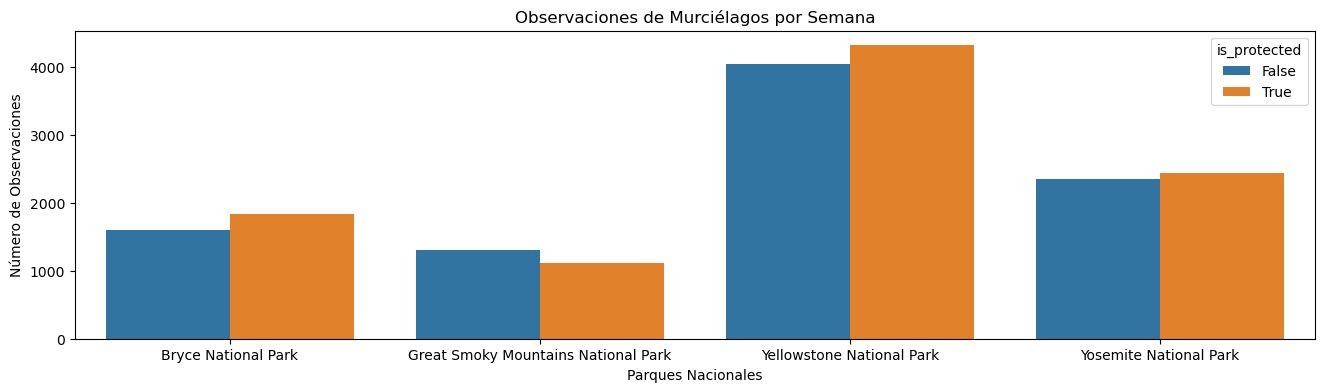

In [29]:
plt.figure(figsize=(16, 4))
sns.barplot(x='park_name', y='observations', data=obs_por_parque, hue='is_protected')
plt.xlabel('Parques Nacionales')
plt.ylabel('Número de Observaciones')
plt.title('Observaciones de Murciélagos por Semana')
plt.show()

## Conclusiones

El proyecto fue capaz de proporcionar varias visualizaciones de datos e inferencias sobre varias especies en los cuatro parques nacionales de EEUU que compusieron este conjunto de datos.

Este proyecti también fue capaz de responder algunas de las preguntas que propusimos al principio:

- ¿Cuál es la distribución del estatus de conservación para las especies?
    - La basta mayoría de especies no formaron parte de la conservación. (5,633 vs 191)
- ¿Están ciertos tipos de especies más cerca de estar en peligro de extinción?
    - Los mamíferos y las aves tuvieron un alto porcentage de estar en protección.
- ¿Son significativas las diferencias entre especies y su estado de conservación?
    - Mientras que los mamíferos y las aves no tuvieron diferencias significativas en el porcentage de conservación, mamíferos y reptiles exhibieron una diferencia estadísticamente significativa.
- ¿Qué animal es más frecuente y cuál es su distribución entre los parques de EEUU?
    - El estudio descubrió que los murciélagos aparecieron un mayor número de veces y que ellos son más fáciles de encontrar en Yellowstone National Park.

## Más Investigación

Este conjunto de datos sólo incluía observaciones de los últimos 7 días lo cual hace imposible el analizar los cambios a lo largo del tiempo. Podría ser curioso el ver como el estatus de conservación para varias especies cambia a lo largo del tiempo. Otra pieza que se está perdiendo es el Área de cada parque, puede ser asumido que Yellowstone National Park quizás sea mucho más grande que los otros parques lo cual explicar que pudiera exhibir más observaciones y mayor biodiversidad. Por último, si se registraran ubicaciones precisas, también se podría observar la distribución espacial de las especies y probar si estas observaciones están agrupadas espacialmente.